# Auto-diff with JAX

https://github.com/google/jax

(-0.5, 1199.5, 693.5, -0.5)

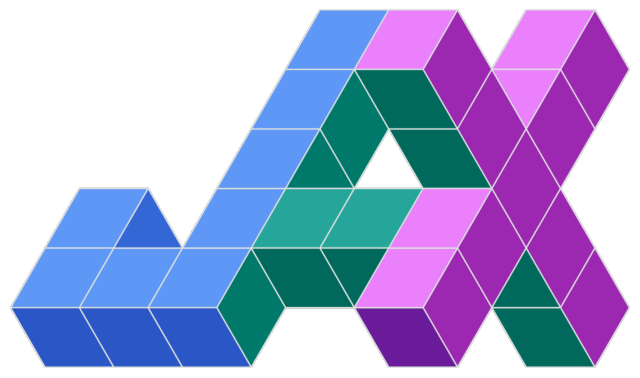

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
A = imread('JAX.png')
img = plt.imshow(A)
plt.axis('off')

JAX is a Google research project, developed by the former developers of [Autograd](https://github.com/hips/autograd), bringing together the potentialities of Autograd and the linear algebra accelerator [XLA](https://www.tensorflow.org/xla). It is based on three pillars:
- `grad`: Automatic Differentiation
- `jit`: Just-in-time compilation
- `vmap`: Automatic vectorization.

## Automatic differentiation in JAX

JAX augments numpy and Python code with function transformations which make it trivial to perform operations common in machine learning programs. JAX's augmented numpy lives at `jax.numpy`. With a few exceptions, you can think of `jax.numpy` as directly interchangeable with `numpy`. As a general rule, you should use `jax.numpy` whenever you plan to use any of JAX's transformations.

The function `df = jax.grad(f, argnums = 0)` takes the callable object `f` and returns another callable object, `df`, evaluating the gradient of `f` w.r.t. the argument(s) of index(es) `argnums`. For more information, check out the [documentation](https://jax.readthedocs.io/en/latest/jax.html?highlight=grad#jax.grad).

**Example**

We consider the function:
$$
f(x) = x \sin(x^2)
$$

and we compute $f'(x_0)$ for $x_0 = 0.13$

In [2]:
import numpy as np
import jax.numpy as jnp
import jax

func = lambda x : x*jnp.sin(x**2)
x0 = 0.13
dfunc_AD = jax.grad(func)
df_AD = dfunc_AD(x0)

# analytical derivative
dfunc = lambda x : np.sin(x**2)+2 * x**2 * np.cos(x**2)
df_ex = dfunc(x0)

print('df (ex): %f' % df_ex)
print('df (AD): %f' % df_AD)

print('err (AD): %e' % (abs(df_AD - df_ex)/abs(df_ex)))

df (ex): 0.050694
df (AD): 0.050694
err (AD): 7.348529e-08


Evaluate the execution times of the functions `func` and `dfunc_AD`.

In [3]:
%timeit func(x0)

24.9 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%timeit dfunc_AD(x0)

3.92 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Speed it up with JIT!

Compile the functions `func` and `dfunc_AD` using the [just-in-time compilation](https://en.wikipedia.org/wiki/Just-in-time_compilation) utility `jax.jit`. 

With `f_jit = jax.jit(f)` a callable `f` is compiled into `f_jit`.

Then, check that the compiled functions return the same results as the original ones. Finally, evaluate the execution times and compare it with the previous results.

In [8]:
func_jit = jax.jit(func)
f_jit = func_jit(x0)
print(func(x0) - f_jit)

0.0


In [9]:
%timeit func_jit(x0)

9.66 µs ± 85.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
dfunc_AD_jit = jax.jit(dfunc_AD)
df_AD_jit = dfunc_AD_jit(x0)
df_AD - df_AD_jit

Array(0., dtype=float32, weak_type=True)

In [11]:
%timeit dfunc_AD_jit(x0)

9.85 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
